<font color='green'> Добрый день ! Сделал свой проект в несколько вариантов , кроме того в отдельном файле я сделал этот же проект   в другой библиотеке pycaret его можно запустит в colab , это по моему намного  удобнее и эффективнее .Если интересно посмотри. Жду твоих коментарии. Спасибо </font> 

<font color='blue'> 
### <u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
</font>

<font color='blue'>
<br />
Александр, привет! <br />
Здорово, когда одну задачу решают разными вараинтами. В этом просматривается некая зрелость<br>
Хотя pycaret - чаще всего, это следующая серия кино))) <br>
так сказать - повышенный уровень мастерства).<br>
Но обязательно посмотрю, спасибо) 

<br /><br />
Меня зовут Николай. <br />И на этом этапе твоего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='orange'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако есть на что обратить внимание в плане применения техник, или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Моей целью является не "уличить" в не знании, а просто высказать сверху твоих знаний - свой опыт, что бы ты мог использовать его для своего дальнейшего успеха)
<br>
</font>
<br>

</font>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# 1. Подготовка данных

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.utils import shuffle
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [72]:
data = pd.read_csv('Churn.csv')

In [73]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [75]:
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [76]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Удалим явно лишний столбец: RowNumber
    
Такжу удалим столбец Surname, так как врядли имя может влияеть на вероятность ухода из банка.

Проверим столбец CustomerId на уникальность, если он уникальный, объявим его индеком

In [77]:
data = data.drop(columns=['RowNumber', 'Surname'])
data['CustomerId'].nunique() == data.shape[0]

True

In [78]:
data = data.set_index('CustomerId')
data.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
15647311,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0


<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
есть контакт) согласен.

Видим что есть пропуски в столбце Tenure, заполним медианой

In [2]:
data.loc[data['Tenure'].isna(), 'Tenure'] = data['Tenure'].median()
data.isna().sum().sum()

font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
принято

In [80]:
data['Tenure'].value_counts()

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

Разделим данные на признаки X и целевую переменную y

In [81]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Меняем тип столбца NumOfProducts на object для дальнейшего прямого кодирования.

In [82]:
data['NumOfProducts'] = data['NumOfProducts'].astype('object')

Прямое кодирование категориальных признаков

In [83]:
data = pd.get_dummies(data)

Удаление избыточных стобцов Gender_Male, Geography_Germany и NumOfProducts_4

In [84]:
data = data.drop(['Gender_Male', 'Geography_Germany', 'NumOfProducts_4'], axis=1)

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
А ведь так тоже удаляются лишние столбцы:<br> 
pd.get_dummies(data, drop_first=True)  <br>
Мне проще эти путём)

Создание переменных для признаков и целевого признака

In [85]:
X = data.drop(columns=['Exited'])
y = data['Exited']

Так как у нас нет скрытой тестовой выборки, то с помощью train_test_split разбиваю данные на две части - обучающую и тестовую в соотношении 70:30 соответственно.
    
Сохраняем дисбаланс классов.

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Проверим дисбаланс целевого класса

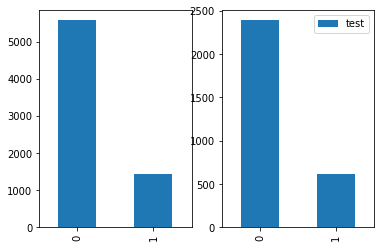

In [87]:
f, (ax1, ax2) = plt.subplots(1, 2)
y_train.value_counts().plot(kind='bar', ax=ax1, label='train')
y_test.value_counts().plot(kind='bar', ax=ax2, label='test')
plt.legend()

font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
ок, принято)

# 2. Исследование задачи

Обучение моделей без учёта дисбаланса

Функция для расчета F1-меры и ROC-AUC и построения графиков.

Предсказание на тестовой выборке после обучения модели на тренировочной выборке.

In [88]:
def f1_roc_auc_score(models):
    models_list = []
    f1 = []
    auc = []
    for model in models:
        model.fit(X_train, y_train)
        test_predictions = model.predict(X_test)
        f1_test_score = round(f1_score(y_test, test_predictions), 2)
        probabilities_test = model.predict_proba(X_test)
        probabilities_one_test = probabilities_test[:, 1]
        auc_roc = round(roc_auc_score(y_test, probabilities_one_test), 2)
        models_list.append(type(model).__name__)
        auc.append(auc_roc)
        f1.append(f1_test_score)
    fig = go.Figure(
    data=[go.Bar(x=models_list, y=f1)],
    layout=dict(title=dict(text="F1-мера")))
    fig.update_layout(autosize=False,width=700,height=350)
    fig.show('png')
    fig = go.Figure(
    data=[go.Bar(x=models_list, y=auc)],
    layout=dict(title=dict(text="ROC-AUC")))
    fig.update_layout(autosize=False,width=700,height=350)
    fig.show('png')
 
 

font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
классная функция)

In [89]:
models = [LogisticRegression(random_state=42), 
          DecisionTreeClassifier(random_state=42), 
          RandomForestClassifier(random_state=42)]

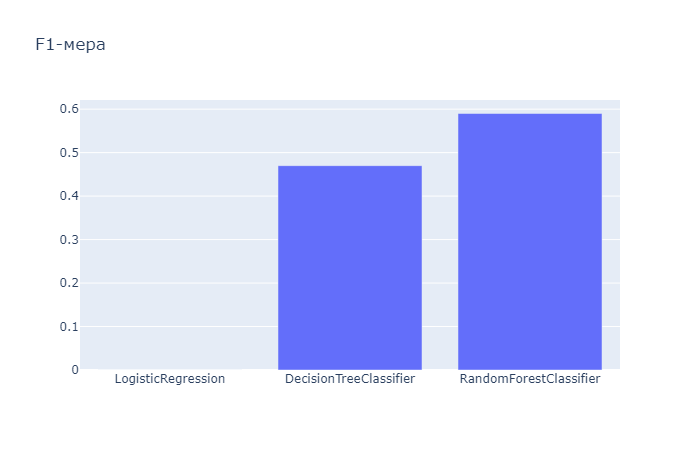

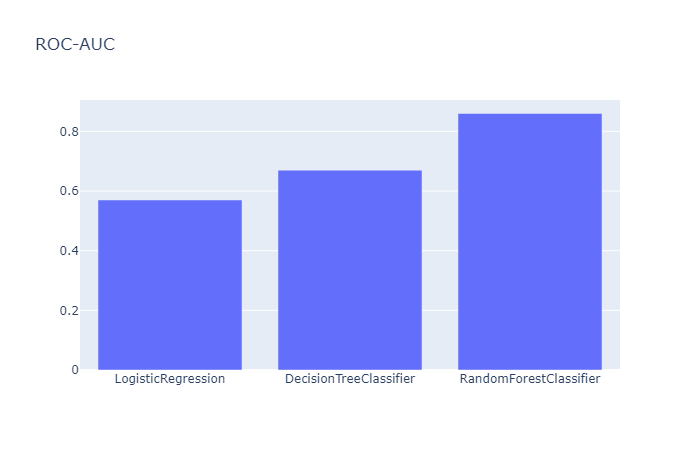

In [90]:
f1_roc_auc_score(models)

Вывод:
На тестовой выборке без учета дисбаланса лучшее значение F1-меры 0.55 удалось достичь, используя RandomForestClassifier. 

У DecisionTreeClassifier результат немного меньше - 0.48. Самый худший результат 0.1 показала LogisticRegression.

Не наблюдается зависимости значений F1-меры и ROC-AUC.

#### Можно по другому 

In [120]:
cv = StratifiedKFold(n_splits=5, random_state=42)

In [139]:
def best_model (model, params, X, y, cv, seed=42):
    '''
    Фунция для поиска оптимальных параметров модели
    Возвращает лучшие результаты кросс валидации
    '''
    grid = GridSearchCV(model, param_grid=params, cv=cv, scoring='f1')
    grid.fit(X, y)
    best_res = pd.DataFrame(grid.cv_results_).query('rank_test_score==1').reset_index().iloc[0, :]    
    return best_res

In [165]:
models = []
params = []

rf = RandomForestClassifier(random_state=42)
params_rf = {'max_features': list(range(1, X.shape[1]+1)),
             'n_estimators': [100]
            }

models.append(rf)
params.append(params_rf)

logit = LogisticRegression(random_state=42, solver='liblinear')
params_logit = {'C': np.logspace(-2, 1, 10)}

dt = DecisionTreeClassifier(random_state=42)
params_dt = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

models.append(logit)
params.append(params_logit)


dt = DecisionTreeClassifier(random_state=42)
params_dt = {'max_depth': list(range(2, 11)),
               'min_samples_split': list(range(2, 17, 2)),
               'min_samples_leaf': list(range(1, 15, 2))}

models.append(dt)
params.append(params_dt)

In [166]:
import tqdm

In [167]:
cols = ['mean_fit_time', 'mean_test_score', 'std_test_score', 'params']
d = []

for m, p in tqdm.tqdm(zip(models, params),total = len(params)):
    d.append(best_model(m, p, X_train, y_train, cv)[cols])

res = pd.DataFrame(data=d, index=['RandomForestClassifier', 'LogisticRegression',' DecisionTreeClassifier'], columns=cols)
res

100%|██████████| 3/3 [01:49<00:00, 36.47s/it]


,mean_fit_time,mean_test_score,std_test_score,params
RandomForestClassifier,0.632653,0.555805,0.011795,"{'max_features': 4, 'n_estimators': 100}"
LogisticRegression,0.030253,0.049335,0.039202,{'C': 0.01}
DecisionTreeClassifier,0.020886,0.546398,0.015893,"{'max_depth': 10, 'min_samples_leaf': 13, 'min..."


Как мы видим случайный лес показывает, лучшие результаты, остановимся на нем

Дополнительно проверим значение roc_auc

In [170]:
rf_params = res.loc['RandomForestClassifier', 'params']
rf = RandomForestClassifier(**rf_params, random_state=42)
cv_score = cross_val_score(rf, X_train, y_train, cv=cv, scoring='roc_auc')
cv_score.mean(), cv_score.std()

(0.8425466499816132, 0.006474677520285327)

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
и так,  и этак - виртуозно). Перебор параметров выглядит более аргуметировано)

# 3. Борьба с дисбалансом

Исследование моделей с учетом дисбаланса

Балансирую вес классов, используя в моделях аргумент class_weight='balanced'

#### Логистическая регрессия

Значимым гиперпараметром является коэффициент регуляризации C. 

Для поиска оптимального значения использую GridSearchCV с кросс-валидацией на пяти подвыборках.

In [91]:
parameters = {'C': (0.01, 0.1, 1, 10, 100, 1000, 10000)}

In [92]:
grid_lr = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'),
                       parameters, cv=5, scoring='f1')
grid_lr.fit(X_train, y_train)
params = grid_lr.best_params_
lr_balanced = LogisticRegression(**params, random_state=42, class_weight='balanced')
lr_balanced.fit(X_train, y_train)
grid_lr.best_params_

{'C': 0.01}

#### Решающее дерево и случайный лес

Для DecisionTreeClassifier и RandomForestClassifier поиск будет 

осуществляться по гиперпараметрам max_depth, min_samples_split и min_samples_leaf. Создаем переменную tree_params

c различными вариантами значений указанных гиперпараметров.

In [93]:
tree_params = {'max_depth': list(range(2, 11)),
               'min_samples_split': list(range(2, 17, 2)),
               'min_samples_leaf': list(range(1, 15, 2))}

Выбор гиперпараметров для решающего дерева. Для поиска оптимального значения используем GridSearchCV с кросс-валидацией на пяти подвыборках.

In [94]:
grid_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'),
                         tree_params, cv=5, n_jobs=-1, scoring='f1') 
grid_dtc.fit(X_train, y_train)
params = grid_dtc.best_params_
dtc_balanced = DecisionTreeClassifier(**params, random_state = 42, class_weight='balanced')
dtc_balanced.fit(X_train, y_train)
grid_dtc.best_params_

{'max_depth': 5, 'min_samples_leaf': 13, 'min_samples_split': 2}

Выбор гиперпараметров для случайного леса. Для поиска оптимального значения использую GridSearchCV с кросс-валидацией на пяти подвыборках.

In [95]:
tree_params = {'max_depth': list(range(2, 11)),
               'min_samples_split': list(range(2, 4, 5)),
               'min_samples_leaf': list(range(1, 2, 3))}

In [96]:
grid_rfc = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), 
                         tree_params, cv=5, n_jobs=-1, scoring='f1') 
grid_rfc.fit(X_train, y_train)
params = grid_rfc.best_params_
rfc_balanced = RandomForestClassifier(**params, random_state = 42, class_weight='balanced')
rfc_balanced.fit(X_train, y_train)
grid_rfc.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [97]:
models_balanced = [lr_balanced, dtc_balanced, rfc_balanced]

Функция для расчета F1-меры и ROC-AUC и построения графиков. Предсказания на тестовой выборке для обученных моделей. 

In [98]:
def f1_roc_auc_score_trained(models):
    models_list = []
    f1 = []
    auc = []
    for model in models:
        test_predictions = model.predict(X_test)
        f1_test_score = round(f1_score(y_test, test_predictions), 2)
        probabilities_test = model.predict_proba(X_test)
        probabilities_one_test = probabilities_test[:, 1]
        auc_roc = round(roc_auc_score(y_test, probabilities_one_test), 2)
        models_list.append(type(model).__name__)
        auc.append(auc_roc)
        f1.append(f1_test_score)
    fig = go.Figure(
    data=[go.Bar(x=models_list, y=f1)],
    layout=dict(title=dict(text="F1-мера")))
    fig.update_layout(autosize=False,width=700,height=350)
    fig.show('png')
    fig = go.Figure(
    data=[go.Bar(x=models_list, y=auc)],
    layout=dict(title=dict(text="ROC-AUC")))
    fig.update_layout(autosize=False,width=700,height=350)
    fig.show('png')

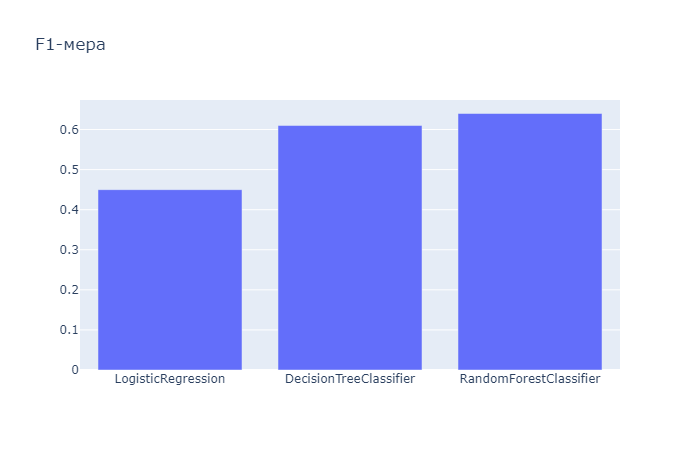

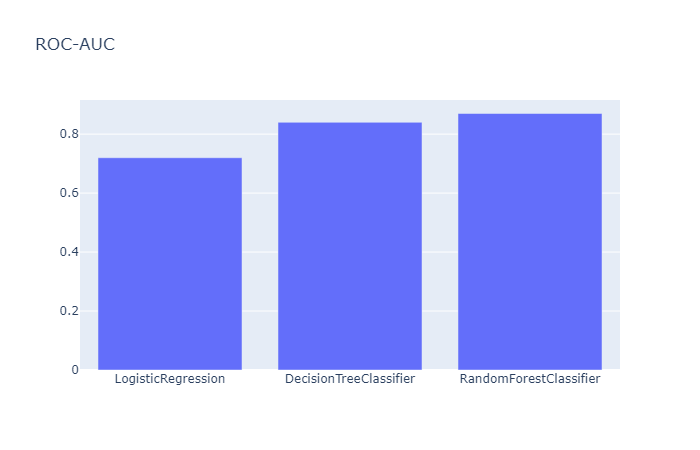

In [99]:
f1_roc_auc_score_trained(models_balanced)

Используем ещё один способ борьбы с дисбалансом классов - уменьшение выборки

Создаю функцию downsample, которая делит обучающую выборку на отрицательные и положительные объекты, случайным образом отбрасывает часть из отрицательных объектов и, перемешав данные, создаёт новую обучающую выборку

In [100]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

Для исправления дисбаланса нужно оставить 25% отрицательных объектов

In [101]:
X_downsampled, y_downsampled = downsample(X_train, y_train, 0.25)

In [102]:
(X_downsampled.shape), (y_downsampled.shape)

((2820, 13), (2820,))

#### Обучение моделей после уменьшения выборки

Выбор гиперпараметров для логистической регрессии. Для поиска оптимального значения использую GridSearchCV с кросс-валидацией на пяти подвыборках.

In [103]:
grid_lr = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'),
                       parameters, cv=5, n_jobs=-1, scoring='f1')
grid_lr.fit(X_downsampled, y_downsampled)
params = grid_lr.best_params_
lr_downsample = LogisticRegression(**params, random_state=42, class_weight='balanced')
lr_downsample.fit(X_downsampled, y_downsampled)
grid_lr.best_params_

{'C': 0.01}

In [104]:
grid_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'),
                         tree_params, cv=5, n_jobs=-1, scoring='f1') 
grid_dtc.fit(X_downsampled, y_downsampled)
params = grid_dtc.best_params_
dtc_downsample = DecisionTreeClassifier(**params, random_state = 42, class_weight='balanced')
dtc_downsample.fit(X_downsampled, y_downsampled)
grid_dtc.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Выбор гиперпараметров для случайного леса. Для поиска оптимального значения использую GridSearchCV с кросс-валидацией на пяти подвыборках

In [105]:
grid_rfc = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced'), 
                         tree_params, cv=5, n_jobs=-1, scoring='f1') 
grid_rfc.fit(X_downsampled, y_downsampled)
params = grid_rfc.best_params_
rfc_downsample = RandomForestClassifier(**params, random_state = 42, class_weight='balanced')
rfc_downsample.fit(X_downsampled, y_downsampled)
grid_rfc.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [106]:
models_downsample = [lr_downsample, dtc_downsample, rfc_downsample]

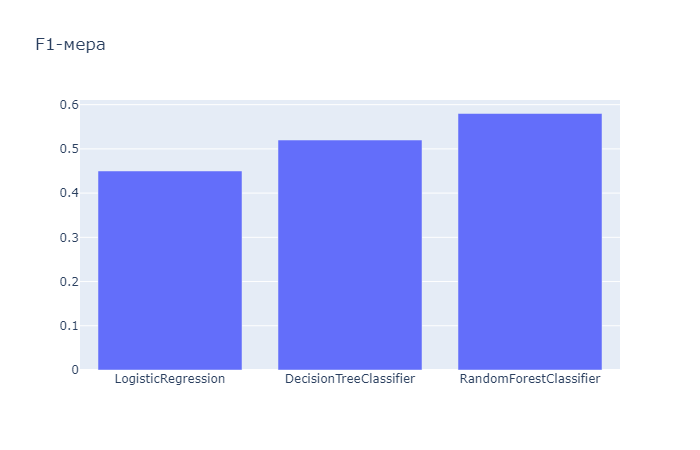

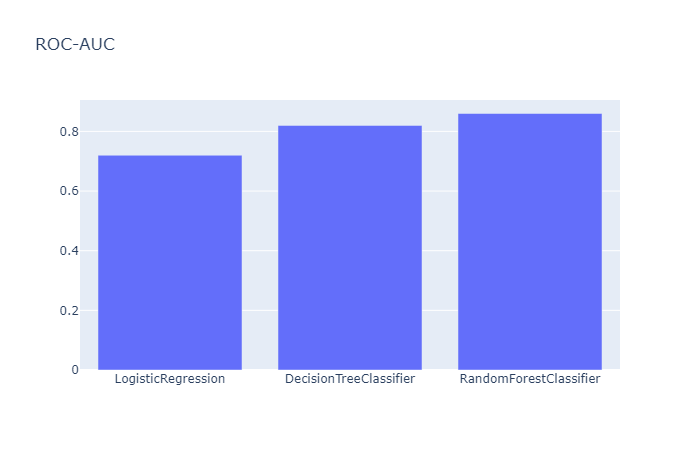

In [107]:
f1_roc_auc_score_trained(models_downsample)

#### Можно попробовать по другому 

In [108]:
def upsampling(X, y, shuffled=True, seed=21):
    '''
    Add samples for balancing data
    :param X: features DataFrame 
    :param y: target Series
    :param shuffled: if True output DataFrames will be shuffled
    :param seed: seed for numpy.seed()
    :return: X_up, y_up two DataFrames with upsampled data
    '''
    np.random.seed(seed)
    y_min_value = y.value_counts().sort_values().index[0]
    y_max_value = y.value_counts().sort_values().index[1]
    min_class_cnt = y.value_counts().min()
    max_class_cnt = y.value_counts().max()
    
    coef = max_class_cnt / min_class_cnt - 1
    idx = np.random.randint(0,
                            min_class_cnt,
                            size=np.round(min_class_cnt*coef).astype(int))
    
    X_new = X[y==y_min_value].values[idx]
    y_new = y[y==y_min_value].values[idx]
    
    X_up = pd.concat([X]+[pd.DataFrame(data=X_new, index=idx, columns=X.columns)])
    y_up = pd.concat([y]+[pd.Series(data=y_new, index=idx)])
    
    if shuffled:
        return shuffle(X_up, y_up, random_state=seed)
    else:
        return X_up, y_up

((11148, 13), (11148,))

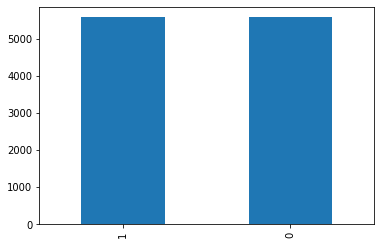

In [109]:
X_train_up, y_train_up = upsampling(X_train, y_train)

y_train_up.value_counts().plot(kind='bar')
X_train_up.shape, y_train_up.shape

Как видим upsampling помог выровнять дисбаланс классов

Дополнительно проверим не сломали ли мы распределение признаков на примере CreditScore

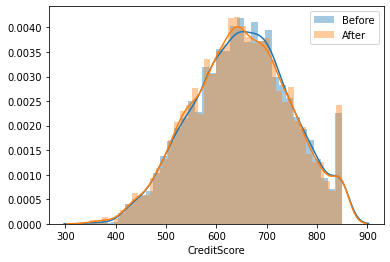

In [110]:
sns.distplot(X_train['CreditScore'], label='Before')
sns.distplot(X_train_up['CreditScore'], label="After")
plt.legend()

Как мы видим распределения практически идентичные, не забываем, что seaborn отмасштабировал графики по оси y.

Теперь реализуем downsampling, и выполним такие же проверки

In [111]:
def downsampling(X, y, shuffled=True, seed=21):
    '''
    Removind samples from biggest class for balancing data
    :param X: features DataFrame 
    :param y: target Series
    :param shuffled: if True output DataFrames will be shuffled
    :param seed: seed for numpy.seed()
    :return: X_down, y_down two DataFrames with downsampled data
    '''    
    np.random.seed(seed)
    y_min_value = y.value_counts().sort_values().index[0]
    y_max_value = y.value_counts().sort_values().index[1]
    min_class_cnt = y.value_counts().min()
    max_class_cnt = y.value_counts().max()
    
    idx = np.random.choice(max_class_cnt,
                           size=max_class_cnt - min_class_cnt,
                           replace=False)   
    print(idx.shape, max_class_cnt - min_class_cnt)
  
    X_down = X.drop(X[y==y_max_value].index[idx])
    y_down = y.drop(y[y==y_max_value].index[idx])
    
    if shuffled:
        return shuffle(X_down, y_down, random_state=seed)
    else:
        return X_down, y_down

(4148,) 4148


((2852, 13), (2852,))

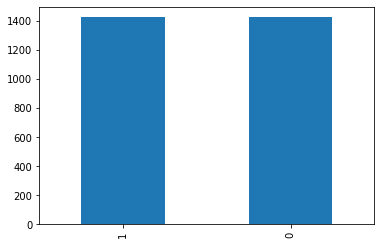

In [112]:
X_train_down, y_train_down = downsampling(X_train, y_train)

y_train_down.value_counts().plot(kind='bar')
X_train_down.shape, y_train_down.shape

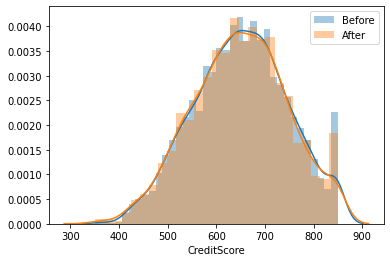

In [113]:
sns.distplot(X_train['CreditScore'], label='Before')
sns.distplot(X_train_down['CreditScore'], label="After")
plt.legend()

#### 3.1 Проверка модели на новых данных

In [116]:
results = {'roc_auc_mean': [],
           'roc_auc_std': [],
           'f1_mean': [],
           'f1_std': []}

XX = [X_train, X_train_up, X_train_down]
yy = [y_train, y_train_up, y_train_down]
index = ['source', 'up', 'down']

metrics = ['roc_auc', 'f1']

for x, y, i in zip(XX, yy, index):
    for m in metrics:
        print('Calculate '+ m + ' metrics for '+ i, end='...')
        cv_score = cross_val_score(grid_rfc, x, y,  scoring=m)
        results[m + '_mean'].append(cv_score.mean())
        results[m + '_std'].append(cv_score.std())
        print('Done!')

pd.DataFrame(data=results, index=index)

Calculate roc_auc metrics for source...Done!
Calculate f1 metrics for source...Done!
Calculate roc_auc metrics for up...Done!
Calculate f1 metrics for up...Done!
Calculate roc_auc metrics for down...Done!
Calculate f1 metrics for down...Done!


,roc_auc_mean,roc_auc_std,f1_mean,f1_std
source,0.849413,0.008071,0.601192,0.009824
up,0.941463,0.005074,0.871124,0.009157
down,0.843953,0.016532,0.756230,0.021110


Мы видим существенный прирост качества на данных с upsampling

Это связано с переобучением модели, так как часть данных в результате перемешивания были и в обучающей и в валидационнй выборке на кросс валидации.

# 4. Тестирование модели

In [117]:
grid_rfc.fit(X_train_up, y_train_up)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [118]:
y_pred = grid_rfc.predict(X_test)
y_pred_proba = grid_rfc.predict_proba(X_test)[:, 1]
f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_proba)

(0.6268221574344023, 0.8682717227554826)

#### Вывод
На тестовой выборке лучшее значение F1-меры у RandomForestClassifier: 0.62 у модели, обученной с балансировкой весов, 0.56 - на уменьшенной выборке. Результаты других моделей в пределах 0.46-0.52. ROC-AUC слабочувствительна к дисбалансу классов, поэтому нет значительных изменений.

<font color='blue'><u><b>КОММЕНТАРИЙ РЕВЬЮЕРА</b></u></font><br />
<font color='green'>
<br/> Александр, я выдохнул) это было захватывающе))<br>
Как в хорошем фильме: своевременная раскадровка и хороший комментарий.<br>
Это я про параллелизм разных решений.<br>
 
На мой взгляд: настоящая аналитическая DS-работа<br>
Вроде всего хватало при работе с моделями<br>
У тебя море идей по поиску лучшей модели. Есть ещё потенциал - в работе с признаками.<br>
Ты с ними неплохо поработал. Просто можно на основе их создавать новые признаки, а можно в выводах озвучить идеи, какие бы признаки помогли ещё... Но это я так, если картину в целом рисовать<br>
    
Ещё один момент на обсуждение:<br>
Ты считал всё время метрики f1 и AUC. Но ты помнишь, что это обобщённые мерики<br>
А в бизнесе очень важно следить за конкретикой: т.е. такие меры как полнота и точность <br>
порой, больше интересует бизнес. Т.к. через них можно выйти на финансовый расчёт.
    
В общем, ты сделал так, что мне и добавить то нечего) спасибо<br>
(Работу библиотеки - обязательно посмотрю)
<br><br>
УСПЕШНОГО ДАЛЬНЕЙШЕГО ОБУЧЕНИЯ!

</b></font>

# Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнен шаг 1: данные подготовлены
- [ ]  Выполнен шаг 2: задача исследована
    - [ ]  Исследован баланс классов
    - [ ]  Изучены модели без учёта дисбаланса
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 3: учтён дисбаланс
    - [ ]  Применено несколько способов борьбы с дисбалансом
    - [ ]  Написаны выводы по результатам исследования
- [ ]  Выполнен шаг 4: проведено тестирование
- [ ]  Удалось достичь *F1*-меры не менее 0.59
- [ ]  Исследована метрика *AUC-ROC*